# Urban Service Calls and Population Characteristics in Los Angeles County
Author: Thien
Description: This notebook explores spatial patterns in 311 calls related to homelessness, illegal dumping, and bulky item pickup in LA County.

In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Read tract shapefile
tracts = gpd.read_file("data/LACountyTracts24.zip")

# Read 311 call data
df_calls = pd.read_csv("data/All_Years_311_Calls_Type_Calculations.csv")

# Define 311 call data columns to keep
columns_to_keep = [ 'FIPS',           
                    'year',
                    'denom_total_pop',
                    'total_calls',
                    'total_calls_rate',
                    'homeless_encampment',
                    'homeless_encampment_rate',
                    'illegal_dumping',
                    'illegal_dumping_rate',
                    'bulky_items',
                    'bulky_items_rate']

# Add 311 call data to a new dataframe
df_calls2 = df_calls[columns_to_keep].copy()

# Rename columns in df_calls2
df_calls2.columns = ['FIPS',
              'Year',
              'Total Population (Denominator)',
              'Total 311 Calls',
              '311 Calls per Capita',
              'Homeless Encampment Reports',
              'Homeless Encampment Rate',
              'Illegal Dumping Reports',
              'Illegal Dumping Rate',
              'Bulky Item Reports',
              'Bulky Item Rate']


# Format ID and FIPS
tracts['ID'] = tracts['ID'].astype(str).str.strip().str.zfill(11)
df_calls2['FIPS'] = df_calls2['FIPS'].astype(str).str.strip().str.zfill(11)

# Merge a new dataframe
tracts_merged = tracts.merge(df_calls2, left_on='ID', right_on='FIPS')





<Axes: >

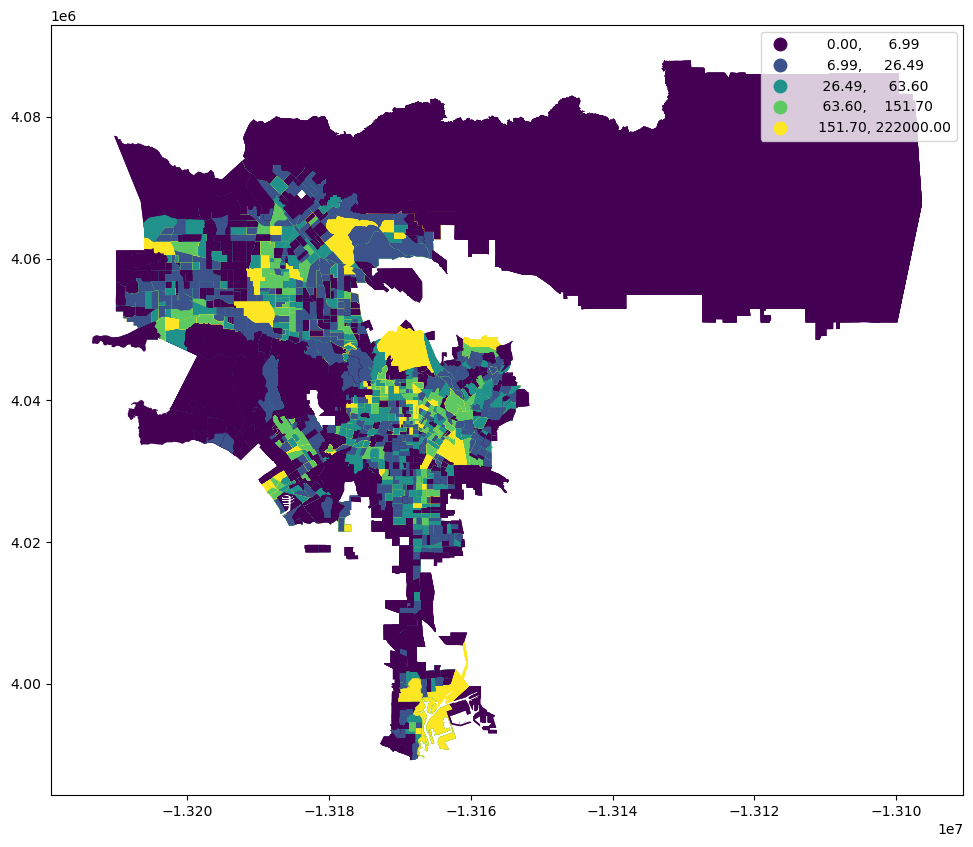

In [46]:
# Plot the map showing Homeless Encampment Rate
tracts_merged.plot(figsize=(12,10),
                 column='Homeless Encampment Rate',
                 legend=True, 
                 scheme='quantiles')


<Axes: >

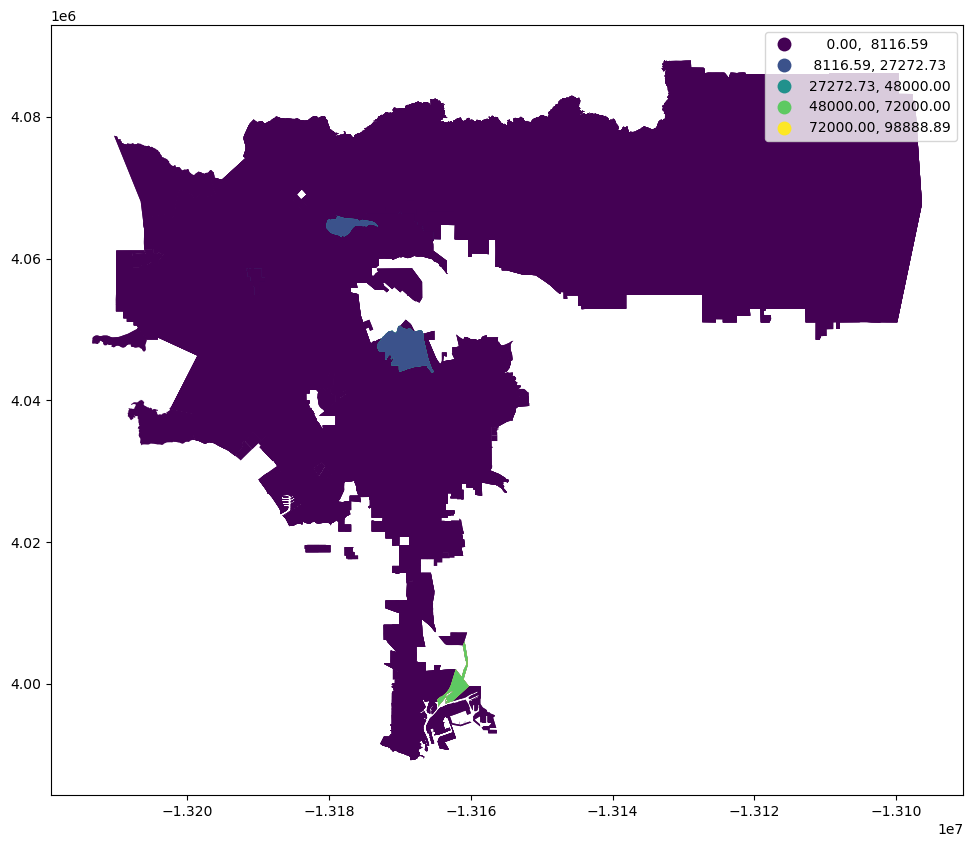

In [49]:
# Plot the map showing Illegal Dumping Rate
tracts_merged.plot(figsize=(12,10),
                 column='Illegal Dumping Rate',
                 legend=True, 
                 scheme='natural_breaks')

<Axes: >

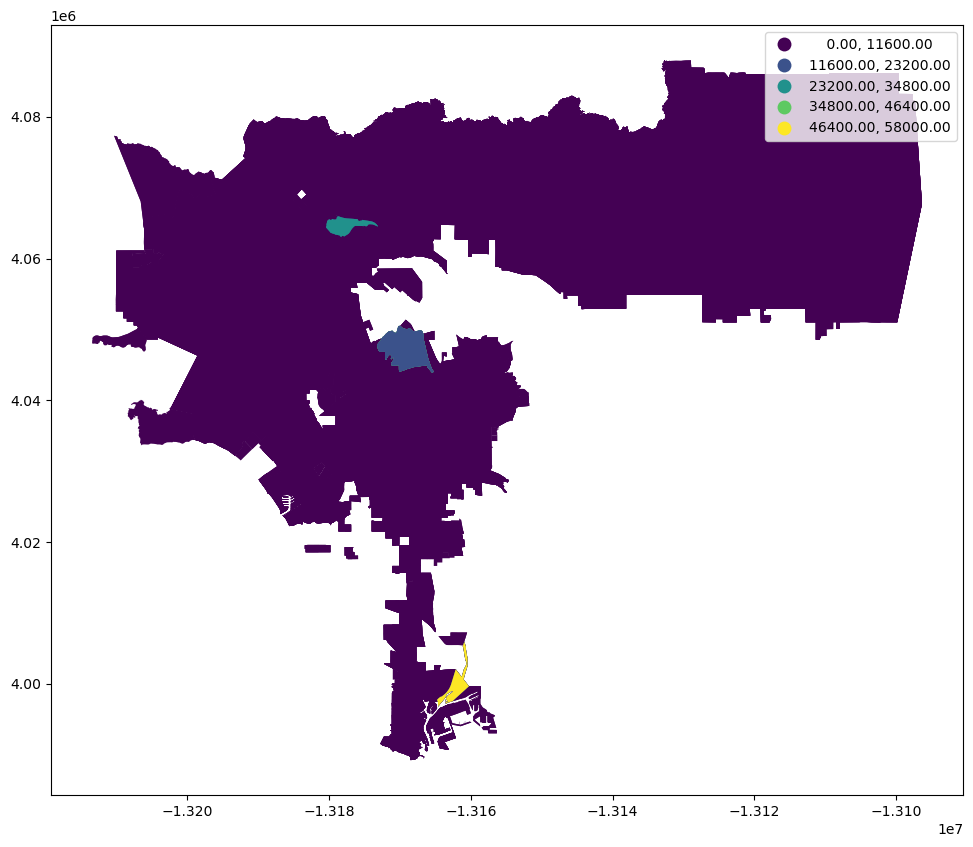

In [50]:
# Plot the map showing Bulky Item Rate
tracts_merged.plot(figsize=(12,10),
                 column='Bulky Item Rate',
                 legend=True, 
                 scheme='equal_interval')